In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import uniform, norm
import sys
from matplotlib import cm

sys.path.append('../')
from src.stats import *
from src.distributions import hypsecant2, double_pareto
from src.multivariate_distributions import simple_multivariate_normal_mixture
from src.figures import *

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
sns.set_style('darkgrid')

%matplotlib inline

In [32]:
from scipy.special import comb, factorial

def irwin_hall_pdf(x, n):
    """
    Probability density function for the Irwin-Hall distribution.
    It is the distribution of the sum of n independent and uniformly distributed random variables,
    each of which has a probability density function f(x) = 1 (for 0 <= x <= 1).
    """
    # The Irwin-Hall PDF is a piecewise function, so we'll calculate it in pieces
    # Initialize the PDF to zero
    pdf = np.zeros_like(x)
    for k in range(n + 1):
        # Calculate the piecewise function
        pdf_piece = ((-1) ** k) * comb(n, k) * (x - k) ** (n - 1)
        # Add the piece to the PDF, making sure to handle the domain correctly
        pdf_piece[(x < k) | (x > n)] = 0
        pdf += pdf_piece
    # Normalize the PDF by dividing by the factorial and ensuring non-negative domain
    pdf = pdf / factorial(n - 1)
    pdf[x < 0] = 0
    pdf[x > n] = 0
    return pdf

def irwin_hall_cdf(x, n):
    """
    Probability density function for the Irwin-Hall distribution.
    It is the distribution of the sum of n independent and uniformly distributed random variables,
    each of which has a probability density function f(x) = 1 (for 0 <= x <= 1).
    """
    # The Irwin-Hall PDF is a piecewise function, so we'll calculate it in pieces
    # Initialize the PDF to zero
    cdf = np.zeros_like(x)
    for k in range(n + 1):
        # Calculate the piecewise function
        cdf_piece = ((-1) ** k) * comb(n, k) * (x - k) ** n
        # Add the piece to the PDF, making sure to handle the domain correctly
        cdf_piece[(x < k) | (x > n)] = 0
        cdf += cdf_piece
    # Normalize the PDF by dividing by the factorial and ensuring non-negative domain
    cdf = cdf / factorial(n)
    cdf[x < 0] = 0
    cdf[x > n] = 0
    return cdf

# Define a function to calculate the mean and variance of the Irwin-Hall distribution
def irwin_hall_mean_variance(n):
    mean = n / 2
    variance = n / 12
    return mean, variance

# # Re-plotting each subplot and adding the Gaussian PDF
# fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# for i in range(1, 5):
#     # Calculate the mean and variance for the Gaussian approximation
#     mean, variance = irwin_hall_mean_variance(i)
#     # Generate the x values
    
#     # Generate the Irwin-Hall PDF
#     x_ih = np.linspace(0, i, 1000)
#     y_ih = irwin_hall_pdf(x_ih, i)
#     axs[(i-1)//2, (i-1)%2].plot(x_ih, y_ih, label='Irwin-Hall PDF')
    

#     x_norm = 
    
    
    
#     y_gaussian = norm.pdf(x, loc=mean, scale=np.sqrt(variance))
    
#     # Plot the Irwin-Hall PDF
    
#     axs[(i-1)//2, (i-1)%2].fill_between(x, y_irwin_hall, alpha=0.3)
    
#     # Plot the Gaussian PDF with a dashed line
#     axs[(i-1)//2, (i-1)%2].plot(x, y_gaussian, 'r--', label='Gaussian PDF')
    
#     # Set titles and limits
#     axs[(i-1)//2, (i-1)%2].set_title(f'$\\phi_{i}$')
#     # axs[(i-1)//2, (i-1)%2].set_xlim([0, i*1.2])
#     # axs[(i-1)//2, (i-1)%2].set_ylim([0, max(y_irwin_hall)*1.2])
    
#     # Add legend to each subplot
#     # axs[(i-1)//2, (i-1)%2].legend()

# plt.tight_layout()
# plt.show()


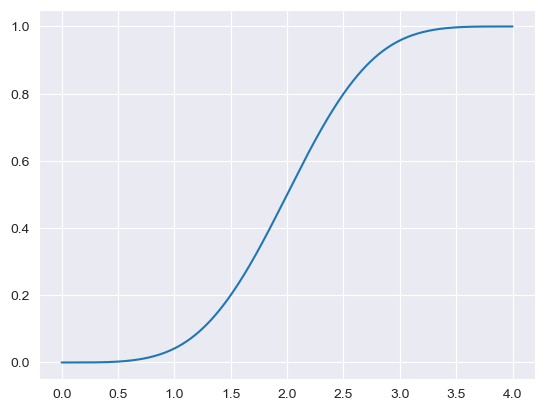

In [35]:
plt.plot(x, irwin_hall_cdf(x, 4))

In [11]:
i = 2

In [12]:
mean, variance = irwin_hall_mean_variance(i)

In [13]:
mean

1.0

In [14]:
variance

0.16666666666666666

In [15]:
x = x_ranges[i]

In [18]:
y_gaussian = norm.pdf(x, loc=mean, scale=np.sqrt(variance))

In [20]:
max(y_gaussian)

0.9772020863231469

0.002002002002002002

In [24]:
np.sum(y_gaussian*np.diff(x)[0])

0.9857913283147173

In [25]:
y_irwin_hall = irwin_hall_pdf(x, i)

In [26]:
np.sum(y_irwin_hall*np.diff(x)[0])

0.49999949899849805